# TITANIC DATASET BASIC ANALYSIS: DESCRIPTIVE STATISTICS

In [2]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from scipy.stats import pearsonr
DATASET_FOLDER = "Dati"

In [4]:
titanic = pd.read_csv('titanic.csv')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titanic.info() 
#restituisce info sul dataset, ad esempio si vede che in cabin e age mancano svariati valori

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
titanic.describe()
# describe prende le variabili NUMERICHE e ci fa alcune statistiche sopra

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Statistiche descrittive (concentrandoci su Age)

In [16]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### Media

In [18]:
# Media
titanic['Age'].mean() 
# Di solito si indica con mu greca. E' un valore matematico, non preso direttamente dalla serie

29.69911764705882

### Mediana

In [19]:
# Mediana
titanic['Age'].median()
# Valore che taglia la popolazione in due. Restituisce un valore reale preso direttamente dala distribuzione empirica

28.0

### Moda

In [20]:
# Moda
titanic['Age'].mode()
# Valore più frequente della serie

0    24.0
Name: Age, dtype: float64

### Varianza e Deviazione standard

Data una variabile $A =\{a_1, a_2,\ldots,a_n\}$
Varianza =  (Quanto si discosta dalla media il dato valore)
Deviazione Standard = La radice quadrata della varianza

### Minimo e Massimo 

In [22]:
titanic['Age'].max()

80.0

In [23]:
titanic['Age'].min()

0.42

## Alcuni ragionamenti sulle variabili 

In [24]:
# Che tipo di variabile abbiamo? 
titanic['Survived'].unique()
# Valori possibili della variabile con unique

array([0, 1], dtype=int64)

In [31]:
titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [26]:
titanic['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [27]:
titanic['Survived'].value_counts()
# Oltre ai valori possibili della variabile, ci da il conteggio di quanti di quei valori ci sono per quel valore

Survived
0    549
1    342
Name: count, dtype: int64

In [29]:
titanic['Pclass'].value_counts()
# Le persone in terza classe erano la maggior parte

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [30]:
titanic['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

## Introduzione alla visualizzazione

<Axes: >

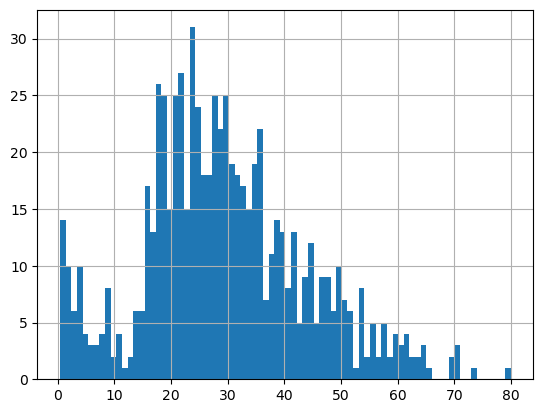

In [32]:
#Istogramma dei valori. Si passano gli intervalli nel quale dividere la popolazione, i bins (ovver quanti intervalli)
titanic['Age'].hist(bins = 80)

<Axes: >

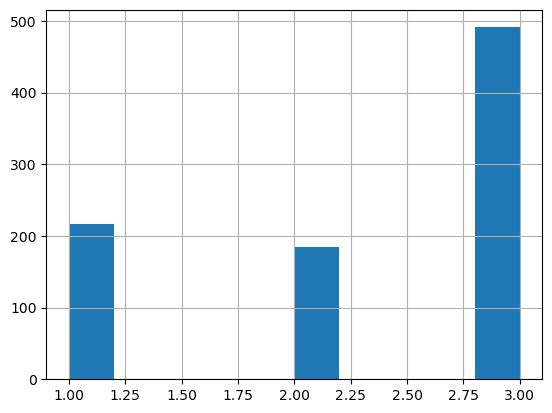

In [34]:
# Quando i valori sono pochi non c'è bisogno di specificare bins
titanic['Pclass'].hist()

### Rispetto alla classe, in quanti sono morti e/o sopravvissuti sul Titanic?

In [35]:
# Esiste un modo di visualizzare i dati in base a combinazioni dele variabili
morti_per_classe = titanic.groupby(['Pclass', 'Survived'])

In [39]:
morti_per_classe.count()['PassengerId']

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

<Axes: >

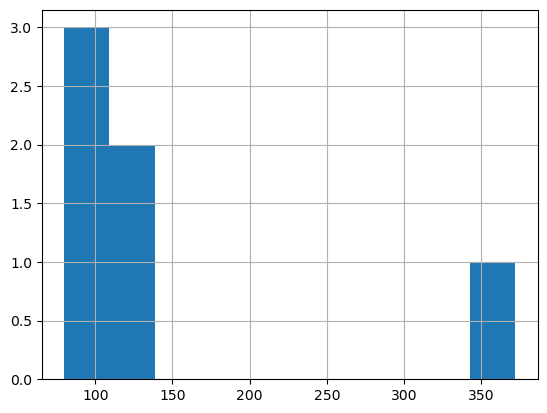

In [40]:
# Come visualizzare? L'istogramma in questo caso è incomprensibile
morti_per_classe.count()['PassengerId'].hist()

(array([ 80.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 136.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

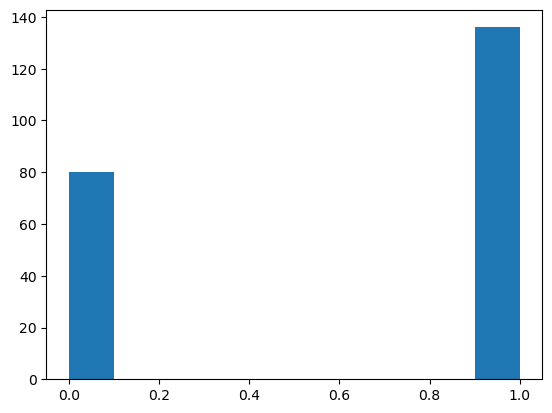

In [45]:
pc = titanic['Pclass'].unique()
# Utilizzando mathplotlib, faccio un istogramma separato per ognuno dei valori
plt.hist(titanic.loc[titanic['Pclass'] == 1, 'Survived'])
# Cosa ho fatto:
# titanic.loc[titanic['Pclass'] == 1, 'Survived'] --> Seleziono tutti i passeggeri che hanno classe 1 che sono sopravvissuti e lo inserisco in un istogramma con matplotlib

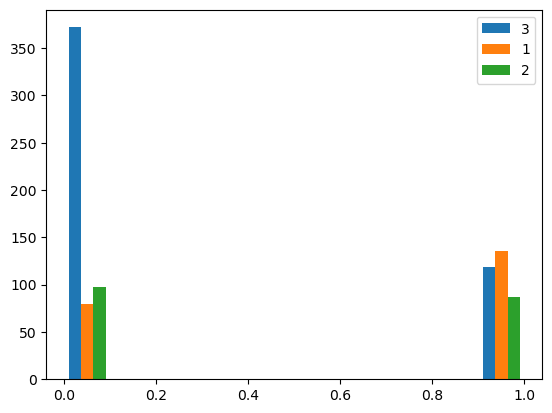

In [50]:
# Come mettere tutto insieme? Invece di inserire ogni volta la classe con un numero nella formula? Con un ciclo
plt.hist([titanic.loc[titanic['Pclass'] == x, 'Survived'] for x in pc], label = pc)
plt.legend()
# label = pc serve per etichettare in base alla classe
# plt.legend stampa una legenda

## Modi alternativi per rispondere alla domanda precente

In [52]:
#Senza groupby e senza filtrare per idpasseggero, con il metodo crosstab di pandas:
pd.crosstab(titanic['Pclass'], titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [55]:
# Inoltre restituisce un dataframe, per cui è possibile farci operazioni
Surv_class = pd.crosstab(titanic['Pclass'], titanic['Survived'])
# Somma rispetto all'asse 1 con sum, cioè somma sulle colonne (Sarebbe il totale delle persone in ogni classe)
Surv_class.sum(1)

Pclass
1    216
2    184
3    491
dtype: int64

In [59]:
# Percentuale di deceduti e morti rispetto alla classe
Surv_class_pct = Surv_class.div(Surv_class.sum(1).astype(float), axis = 0)
# div serve a dividere. L'asse è zero perché si divide sulle righe
Surv_class_pct

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


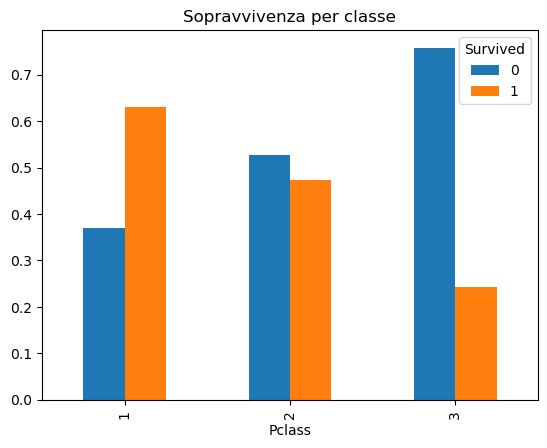

In [60]:
Surv_class_pct.plot(kind = 'bar', title ='Sopravvivenza per classe')
plt.show()

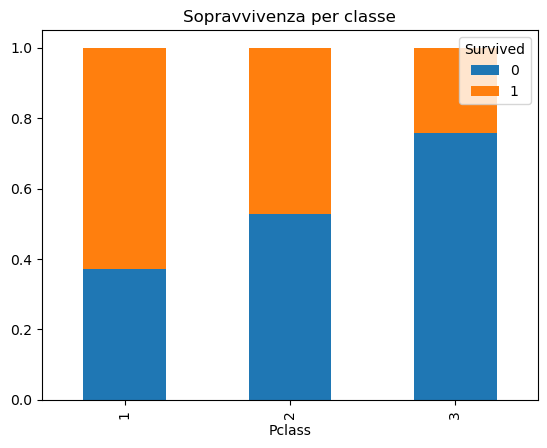

In [61]:
Surv_class_pct.plot(kind = 'bar', title ='Sopravvivenza per classe', stacked = True)
plt.show()

### Rinominare gli assi

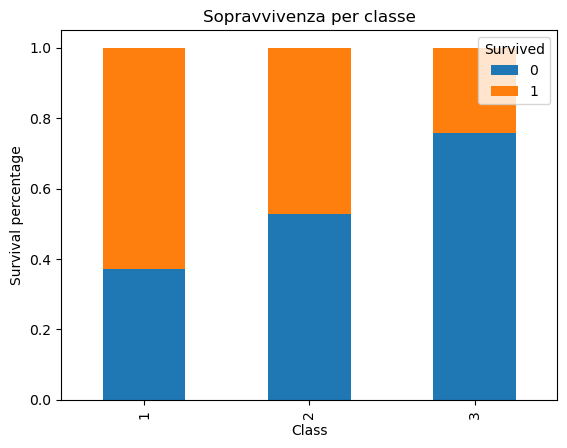

In [62]:
Surv_class_pct.plot(kind = 'bar', title ='Sopravvivenza per classe', stacked = True)
plt.xlabel('Class')
plt.ylabel('Survival percentage')
plt.show()

## Covarianza e Correlazione

In [10]:
# Correlazione di Pearson (varia da -1 a 1) tra survived e age
titanic['Survived'].corr(titanic['Age'])

-0.07722109457217764

### Come si interpreta la correlazione?
Se la correlazione è 1 significa che le due variabili sono perfettamente correlate (all'aumentare di una var anche l'altra aumenta proporzionalmente)

Se la correlazione è 0 significa che non c'è nessuna correlazione (variano in maniera indipendente)

Se la correlazione è -1 significa che c'è una perfetta correlazione negativa (correlazione inversa, se una var aumenta l'altra decresce in maniera proporzionale)

In [ ]:
# Nel nostro caso, non c'è una correlazione tra la sopravvivnza e l'età

In [12]:
# La covarianza
titanic['Survived'].cov(titanic['Age'])

-0.5512960976817095

In [14]:
# Altri modi
titanic[['Survived','Age']].cov()

,Survived,Age
Survived,0.236772,-0.551296
Age,-0.551296,211.019125


In [15]:
titanic[['Survived','Age']].corr()

,Survived,Age
Survived,1.000000,-0.077221
Age,-0.077221,1.000000


## Tradurre variabili categorighe con Pandas (OneHotEncoding)

### Trovare la correlazione tra sopravvisuti e sesso

In [17]:
titanic['Sex'].unique() #Ad esempio il sesso ha due tipi di valori: maschio, femmina

array(['male', 'female'], dtype=object)

In [16]:
pd.get_dummies(titanic['Sex']) # One Hot Encoding: Permette di ottenere dei valori al posto di una variabile categorica

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [19]:
#Ora posso correlare le variabili
#Uso corrwith invece che corr perché le due variabili non hanno la stessa dimensione
pd.get_dummies(titanic['Sex']).corrwith(titanic['Survived'])

female    0.543351
male     -0.543351
dtype: float64

## Proviamo a rimettere le variabili da encoding nel dataset

In [20]:
titanic[['female', 'male']] = pd.get_dummies(titanic['Sex']) #Assegno a female e a male i valori dati da get_dummies

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,True


In [24]:
colonne_interesse = ['male','female','Age','Survived']

In [29]:
correlation_matrix = titanic[colonne_interesse].corr() # Matrice di correlazione per tutte le colonne

## Visualizziamo la correlazione

<Figure size 1900x1500 with 0 Axes>

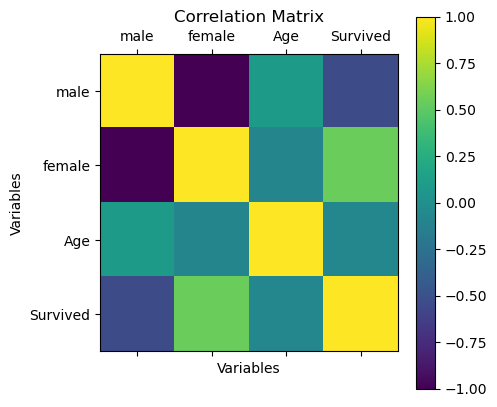

In [36]:
plt.figure(figsize=(19,15))
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(range(len(colonne_interesse)), labels = colonne_interesse) # Da zero fino ad arrivare a 4 escluso, come label invece do le colonne d'interesse
plt.yticks(range(len(colonne_interesse)), labels = colonne_interesse) # Stessa cosa ler le y
cb = plt.colorbar() #Aggiunto una colorbar collegata al valore della correlazione
plt.show()

In [39]:
# Correlazione tra età e prezzo del biglietto
titanic['Age'].corr(titanic['Fare'])
# Si vede una correlazione molto debole

0.09606669176903887

Text(0, 0.5, 'Fare')

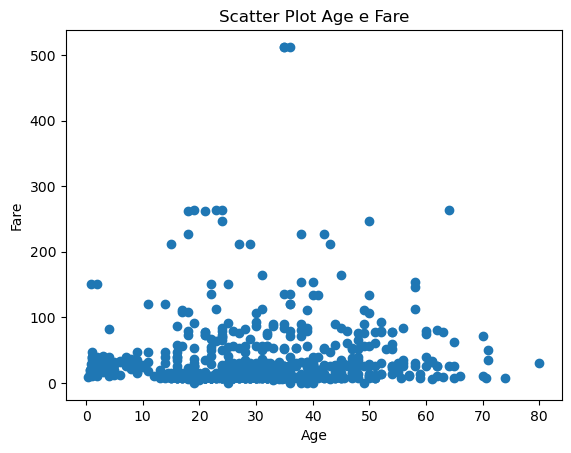

In [46]:
# Grafico a dispersione (Scatter Plot)
plt.scatter(titanic['Age'], titanic['Fare'])
plt.title('Scatter Plot Age e Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
# Lo scatter è molto importante per visualizzare correlazioni tra valori in cui c'è un range di valore ampio, tipicamente tra valori numerici
# Notare che non c'è nessuna correlazione

## Modificare i dati

In [48]:
# Selezionare solo le persone con età inferiore a 18
condizione_minoretà = titanic['Age']<18

In [51]:
ragazzi = titanic[condizione_minoretà]

<Axes: >

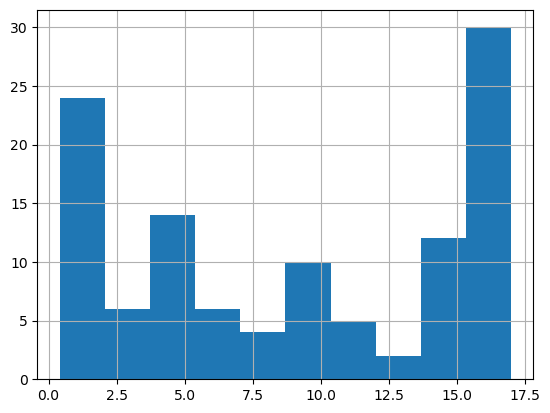

In [53]:
ragazzi['Age'].hist()

<Axes: >

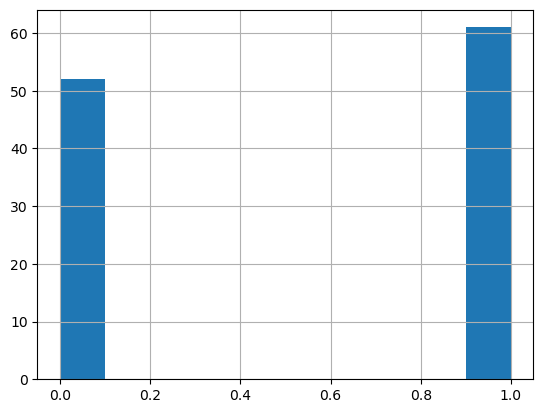

In [54]:
# Sopravvivenza
ragazzi['Survived'].hist()

In [55]:
Sopravvivenza = ragazzi['Survived'] == 1
Decesso = ragazzi['Survived'] == 0

In [56]:
ragazzi_vivi = ragazzi[Sopravvivenza]
ragazzi_morti = ragazzi[Decesso]

<Axes: >

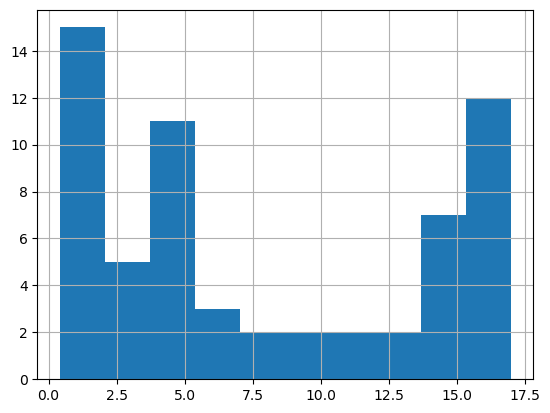

In [58]:
ragazzi_vivi['Age'].hist()

<Axes: >

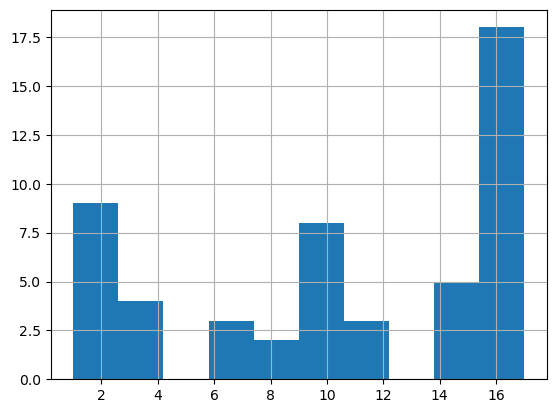

In [59]:
ragazzi_morti['Age'].hist()

In [64]:
# Oppure
titanic[(titanic['Age']<18) & (['Survived'] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
